<a href="https://colab.research.google.com/github/bunnynoddy14/Telecom-Churn-UpGrade/blob/main/Telecom_churn_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries to Perform basic EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

#### Reading and Checking the Dataset

In [7]:
df = pd.read_csv('/content/telecom_churn_data.csv')

In [8]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [9]:
df.shape

(99999, 226)

In [10]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [11]:
### checking the null values in the dataset with percentage in ascending order
df.isnull().sum().sort_values(ascending=False)/len(df)*100

,0
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
...,...
max_rech_amt_7,0.000000
max_rech_amt_6,0.000000
total_rech_amt_9,0.000000
total_rech_amt_8,0.000000


In [12]:
### show coloumn with more than 30% null values from the dataset & drop all them
df.drop(df.loc[:,df.isnull().mean()>0.3].columns,axis=1,inplace=True)

In [13]:
df.shape

(99999, 186)

In [14]:
### Dropping time columns since it is not relevent for our study
df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], axis=1,inplace=True)

In [15]:
df.shape

(99999, 182)

In [16]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 182 columns):
 #    Column               Dtype  
---   ------               -----  
 0    mobile_number        int64  
 1    circle_id            int64  
 2    loc_og_t2o_mou       float64
 3    std_og_t2o_mou       float64
 4    loc_ic_t2o_mou       float64
 5    arpu_6               float64
 6    arpu_7               float64
 7    arpu_8               float64
 8    arpu_9               float64
 9    onnet_mou_6          float64
 10   onnet_mou_7          float64
 11   onnet_mou_8          float64
 12   onnet_mou_9          float64
 13   offnet_mou_6         float64
 14   offnet_mou_7         float64
 15   offnet_mou_8         float64
 16   offnet_mou_9         float64
 17   roam_ic_mou_6        float64
 18   roam_ic_mou_7        float64
 19   roam_ic_mou_8        float64
 20   roam_ic_mou_9        float64
 21   roam_og_mou_6        float64
 22   roam_og_mou_7        float64
 23   roam_og_m

In [17]:
### Few more date columns need to drop
df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis=1,inplace=True)

In [18]:
### Checking data shape again
df.shape

(99999, 178)

In [19]:
## value count of column total_rech_num_6
df['total_rech_num_7'].value_counts()

,count
total_rech_num_7,
4,12425
3,11782
5,10990
6,8982
2,8076
...,...
83,1
98,1
119,1


### Filtering out the high recharge customer

In [20]:
## summing up recharge column to new column and taking average of both the columns to the new column
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [21]:
## As per problem statement finding high value customer
X = df['avg_rech_amt_6_7'].quantile(0.70)
X

368.5

In [22]:
### finding customer who has recharged more than 368.5 amount
df = df[df['avg_rech_amt_6_7'] > X]
df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,109,0.0,0.0,0.0,261.269,410.614,290.851,330.963,5.01,...,0,0,0,0,1022,0.00,0.00,0.00,0.0,392.0
99974,7001453306,109,0.0,0.0,0.0,414.303,321.093,371.016,306.689,17.56,...,0,0,0,0,3054,0.00,0.00,0.00,0.0,465.0
99986,7001729035,109,0.0,0.0,0.0,644.973,455.228,564.334,267.451,806.73,...,0,0,0,0,2696,497.45,598.67,604.08,0.0,848.5
99988,7002111859,109,0.0,0.0,0.0,312.558,512.932,402.080,533.502,199.89,...,0,0,0,0,328,104.73,0.00,0.00,0.0,467.0


In [23]:
df.shape

(29979, 179)

In [24]:
### checking null values in rows more than 50% and removing them
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(114, 179)

In [25]:
df = df.drop(df_missing_rows_50.index)
df.shape

(29865, 179)

In [26]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
spl_og_mou_9,5.32
loc_og_t2t_mou_9,5.32
std_og_t2f_mou_9,5.32
loc_ic_mou_9,5.32
loc_ic_t2m_mou_9,5.32
...,...
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00


In [27]:
## It seems like few of the MOUs month have missing value together. We will check and remove them one by one if it does not impact on loosing the data
print(((df_missing_columns[df_missing_columns['null'] == 5.32]).index).to_list())


['spl_og_mou_9', 'loc_og_t2t_mou_9', 'std_og_t2f_mou_9', 'loc_ic_mou_9', 'loc_ic_t2m_mou_9', 'roam_og_mou_9', 'std_ic_t2f_mou_9', 'std_og_t2m_mou_9', 'std_ic_t2m_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2f_mou_9', 'loc_og_t2m_mou_9', 'std_og_t2t_mou_9', 'loc_og_t2f_mou_9', 'std_ic_t2t_mou_9', 'loc_og_mou_9', 'std_ic_t2o_mou_9', 'roam_ic_mou_9', 'offnet_mou_9', 'std_og_mou_9', 'ic_others_9', 'isd_og_mou_9', 'isd_ic_mou_9', 'og_others_9', 'spl_ic_mou_9', 'loc_og_t2c_mou_9', 'onnet_mou_9', 'std_ic_mou_9', 'std_og_t2c_mou_9']


In [28]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) &
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) &
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) &
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) &
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,109,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,109,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,109,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,109,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [29]:
df_null_mou_9.shape

(1589, 179)

In [30]:
# We can drop them as it does not effect on signicant lost of data from main dataframe
df = df.drop(df_null_mou_9.index)
df.shape

(28276, 179)

In [31]:
# similarly for June July and Aug month have few null values
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
ic_others_8,0.56
spl_og_mou_8,0.56
loc_ic_t2f_mou_8,0.56
std_og_t2t_mou_8,0.56
loc_ic_t2m_mou_8,0.56
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


In [32]:
print(((df_missing_columns[df_missing_columns['null'] == 0.56]).index).to_list())

['ic_others_8', 'spl_og_mou_8', 'loc_ic_t2f_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2t_mou_8', 'og_others_8', 'loc_og_t2m_mou_8', 'isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_t2f_mou_8', 'std_og_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2c_mou_8', 'std_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'std_ic_t2t_mou_8', 'offnet_mou_8', 'std_ic_t2m_mou_8', 'isd_ic_mou_8', 'std_ic_t2f_mou_8', 'onnet_mou_8', 'spl_ic_mou_8', 'std_ic_t2o_mou_8']


In [33]:
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) &
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) &
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) &
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) &
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,109,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,109,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,109,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,109,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
4837,7002192662,109,0.0,0.0,0.0,649.150,149.572,0.0,0.250,1354.24,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [34]:
df = df.drop(df_null_mou_8.index)

In [35]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_t2f_mou_6,0.44
loc_og_t2t_mou_6,0.44
loc_og_t2f_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_og_mou_6,0.44
...,...
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00
std_og_t2c_mou_9,0.00


In [36]:
## Checking and removing June months null value data
print(((df_missing_columns[df_missing_columns['null'] == 0.8]).index).to_list())

[]


In [37]:
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) &
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) &
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) &
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) &
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.shape

(124, 179)

In [38]:
# 124 values can be removed so dropping them from main data
df = df.drop(df_null_mou_6.index)

In [39]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
std_og_t2m_mou_7,0.13
loc_og_t2t_mou_7,0.13
loc_og_t2f_mou_7,0.13
loc_og_t2c_mou_7,0.13
loc_og_mou_7,0.13
...,...
isd_og_mou_9,0.00
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00


In [40]:
# Chekcing July month and removing them if less in counts
print((df_missing_columns[df_missing_columns['null'] == 0.14]).index.to_list())

[]


In [41]:
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) &
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) &
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) &
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) &
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.shape

(35, 179)

In [42]:
## dropping 35 null values
df = df.drop(df_null_mou_7.index)

In [43]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_6,0.0
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0


In [44]:
## now we cleaned all null values from the rows as well
# let's check the count of data again
df.shape

(27960, 179)

### Tagging potential churners which are going to churn as per current usage of calls and internet

In [45]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [46]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


In [47]:
## Checking value count of churn column
df['churn'].value_counts()

,count
churn,
0,27014
1,946


Deleting all the attributes corresponding to the churn phase since the time is gone

In [48]:
# List the columns for churn month(9)
col_9 = [col for col in df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [49]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)

In [50]:
# Dropping sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)

In [51]:
df.shape

(27960, 137)

### Outlier Treatments

In [52]:
## Converting mobile no and churn to object
df['mobile_number'] = df['mobile_number'].astype('object')
df['churn'] = df['churn'].astype('object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27960 entries, 8 to 99997
Columns: 137 entries, mobile_number to churn
dtypes: float64(109), int64(26), object(2)
memory usage: 29.4+ MB


In [54]:
## Listing down only numeric columns except mobile no and churn
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=135)


In [55]:
df.shape

(27960, 137)

In [56]:
## Removing outlier below 10th and above 90th percentile
for col in numeric_cols:
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27674, 137)

In [57]:
## List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

### Deriving new column decrease_mou_action
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [58]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [59]:
# Avg. mou at action phase i.e. 7th and 8th Month
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_ic_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_8'])/2

In [60]:
data['avg_mou_action']

,avg_mou_action
8,324.125
13,1262.390
16,597.705
17,1.560
21,1245.130
...,...
99970,835.515
99974,443.440
99986,1922.755
99988,1155.540


In [61]:

# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [62]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [63]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,667,0.00,0.00,0.00,408.0,0,1341.41,1.560,-1339.850,1
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0


In [64]:
## Adding new column to show whether the number of recharge of the customer has decreased in the action phase than the good phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [65]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [66]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [67]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,21.89,459.0,0,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,0.00,408.0,0,1341.41,1.560,-1339.850,1,3.0,-16.0,1
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0


## Deriving new column decrease_rech_amt_action
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [68]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0)

In [69]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,1341.41,1.560,-1339.850,1,3.0,-16.0,1,15.0,-801.0,1
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0


## Deriving new column decrease_arpu_action

This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [70]:
# ARPU in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,1,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0


## Deriving new column decrease_vbc_action

This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [71]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


## Performing EDA
### Univariate analysis


In [72]:
# Churn rate on the basis whether the customer decreased her/his MOU in action month
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

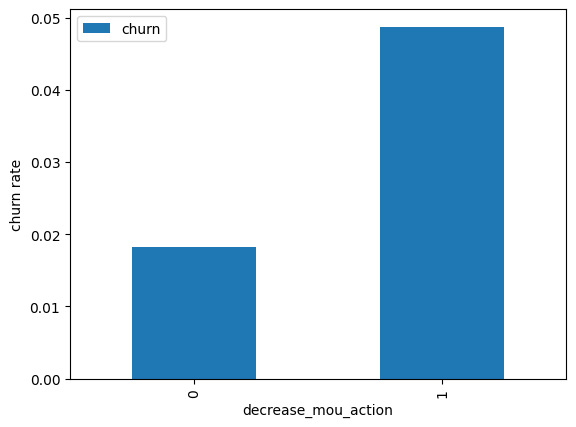

In [73]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

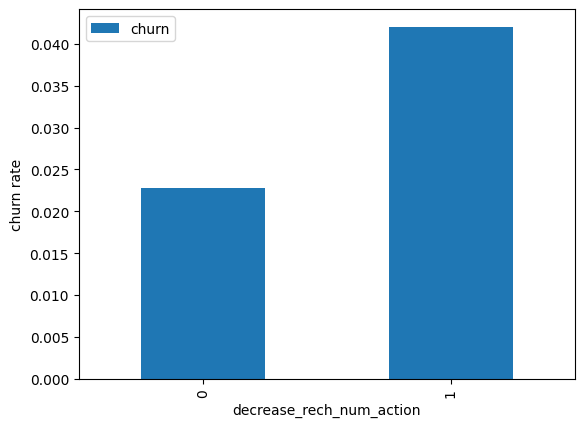

In [74]:
# Churn rate on the basis whether the customer decreased her/his number of recharge in action month
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

It seems the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

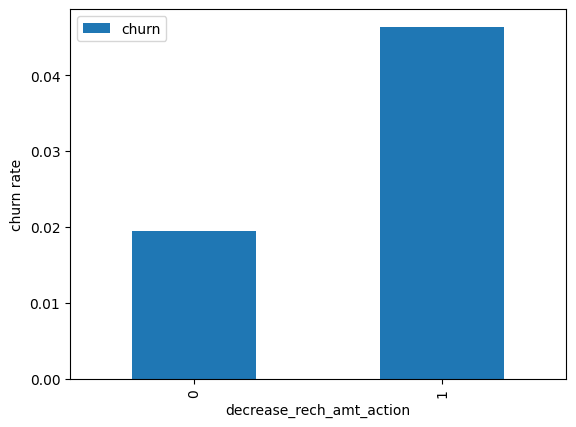

In [75]:
## Churn rate on the basis whether the customer decreased her/his amount of recharge in action month
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

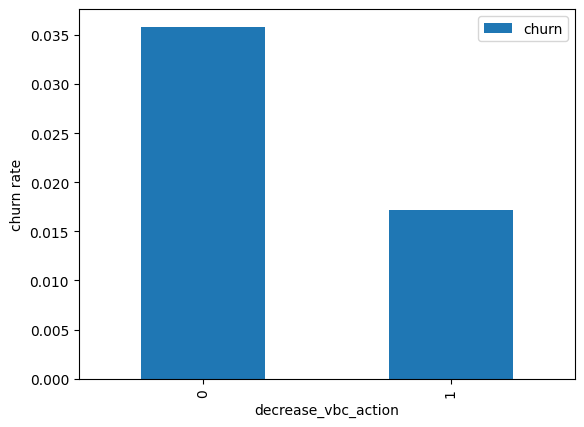

In [76]:
# Churn rate on the basis whether the customer decreased her/his volume based cost in action month
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

In [77]:
## Analysis of the average revenue per customer (churn and not churn) in the action phase

# Creating churn dataframe
data_churn = data[data['churn'] == 1]

# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

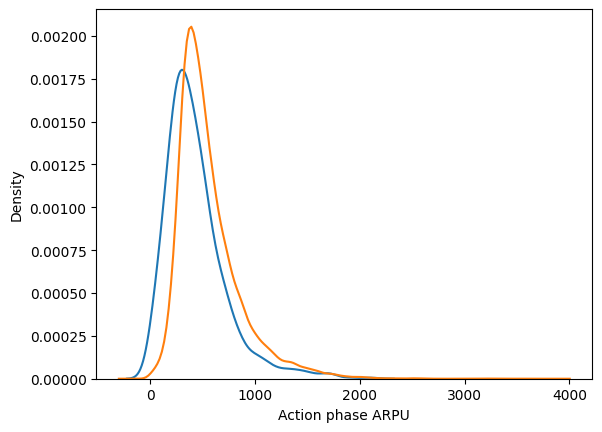

In [78]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000.

[Text(0.5, 0, 'Action phase MOU')]

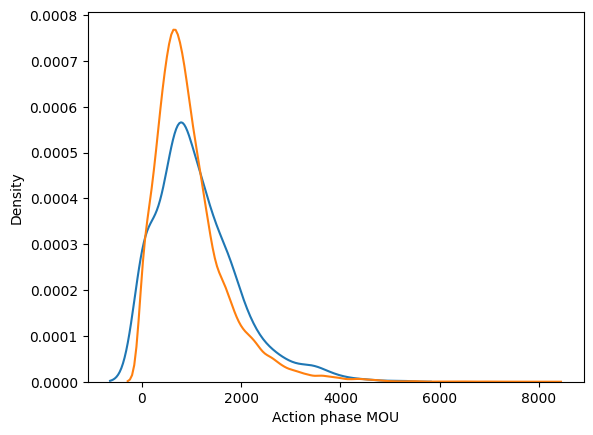

In [79]:
# Analysis of the minutes of usage MOU (churn and not churn) in the action phase
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### Bivariate analysis
Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

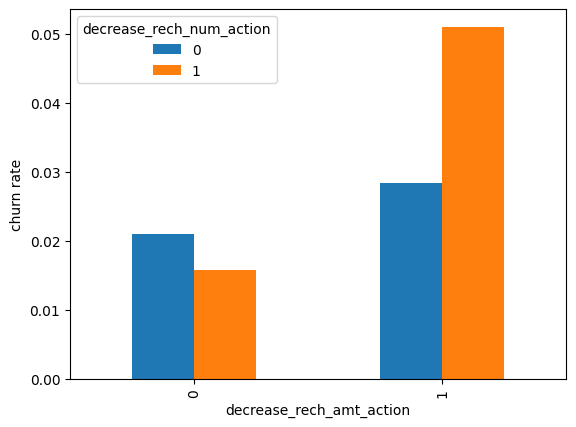

In [80]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

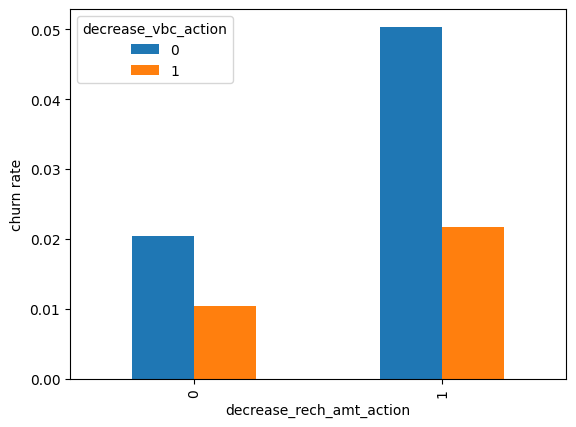

In [81]:
# Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

In [82]:
# Dropping few derived columns, which are not required in further analysis
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

## Train Test Split

In [83]:
from sklearn.model_selection import train_test_split


In [84]:
# dropping target Variable and storing in the y variable
X = data.drop(['mobile_number','churn'], axis=1)
y = data['churn']

In [85]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

Dealing with data imbalance with SMOTE technique

In [86]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE(random_state=27)

# Fit and apply SMOTE to the training data
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [88]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [89]:
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [90]:
X_train.head()


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,0.0,1.262015,0.940398,1.878466,0.429967,-0.046225,0.930270,...,-0.122603,0.675146,-0.256203,-0.267651,-0.263686,1,0,0,1,0
1,0.0,0.0,0.0,0.0,-0.992975,0.034470,0.896615,-0.675350,-0.639887,-0.511148,...,-0.122603,-0.958368,5.381544,7.719881,3.022097,0,0,0,0,0
2,0.0,0.0,0.0,0.0,-0.967358,-1.002797,-0.377111,-0.199997,-0.329665,0.491325,...,-0.122603,-0.729699,-0.256203,-0.267651,-0.263686,0,0,1,1,0
3,0.0,0.0,0.0,0.0,-0.765614,0.041927,-0.012088,-0.594227,0.339098,1.190333,...,-0.122603,-0.839929,-0.256203,-0.267651,-0.263686,0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.708301,-1.542837,-1.128752,-0.544087,-0.680101,-0.551277,...,-0.122603,-0.440053,-0.256203,-0.267651,-0.263686,1,1,1,1,0


In [91]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
41283,0.0,0.0,0.0,0.0,-0.637198,0.477960,0.299299,0.155677,0.763382,0.393127,...,-0.122603,-0.966576,-0.256203,-0.267651,-0.263686,0,0,0,0,0
38343,0.0,0.0,0.0,0.0,0.569234,-0.068889,0.243134,-0.677334,-0.695393,-0.549078,...,-0.122603,2.068264,-0.256203,-0.267651,-0.263686,1,1,1,1,0
29851,0.0,0.0,0.0,0.0,-0.737451,-0.023086,-0.445991,-0.686973,-0.697816,-0.528464,...,-0.122603,-0.877454,-0.256203,-0.267651,-0.263686,0,0,0,0,0
40052,0.0,0.0,0.0,0.0,-0.441636,1.073152,0.170738,-0.758256,-0.685366,-0.485786,...,1.300471,-0.844620,-0.194809,-0.267651,-0.263686,0,0,0,0,0
11286,0.0,0.0,0.0,0.0,0.591487,0.151429,0.809573,-0.706713,-0.701033,-0.531637,...,-0.122603,-0.818821,-0.211308,-0.198660,-0.113069,1,1,0,1,1


In [92]:
### PCA Model
from sklearn.decomposition import PCA

In [93]:
pca = PCA(random_state=42)

In [94]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [95]:
pca.components_

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -2.81681459e-02, -2.83146965e-02,  1.33984091e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.26908180e-02, -1.35847986e-02, -1.48589521e-02],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -4.31744903e-02, -4.35928622e-02,  2.46994085e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.10475941e-12,  5.26021536e-12,  8.69662999e-12],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.78636526e-12, -1.30781466e-12, -8.10037533e-12],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.78420767e-12, -3.35592287e-12, -1.15873805e-11]])

In [96]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11143315 0.19375107 0.24574651 0.29031032 0.33039144 0.36786844
 0.4040676  0.43429002 0.45990958 0.48501071 0.50794464 0.52958742
 0.55066182 0.57065458 0.58930475 0.60669164 0.62277562 0.63824544
 0.65252854 0.66618687 0.67954244 0.69249736 0.7041561  0.71483566
 0.72534393 0.73516214 0.74442079 0.75360921 0.76240292 0.77079666
 0.77916542 0.78690592 0.7942892  0.80159471 0.80855186 0.81531942
 0.82192104 0.82824948 0.83450244 0.8405416  0.84652975 0.85226632
 0.85781242 0.86325856 0.86847926 0.87362287 0.87832352 0.88289821
 0.88737567 0.89163495 0.89565173 0.89941971 0.90304562 0.90665841
 0.91024822 0.91378949 0.91732106 0.92075222 0.92409293 0.9271456
 0.93013992 0.93309946 0.93597614 0.93879704 0.94156898 0.94428073
 0.94690783 0.94942855 0.95193617 0.95438968 0.95672685 0.95903147
 0.96131722 0.96346738 0.96548815 0.96745872 0.96938543 0.9712475
 0.97307547 0.9748267  0.97653481 0.97822284 0.97986038 0.98148629
 0.98308123 0.98463036 0.98615732 0.98751474 0.98880461 0.990031

Text(0, 0.5, 'Cumulative Variance')

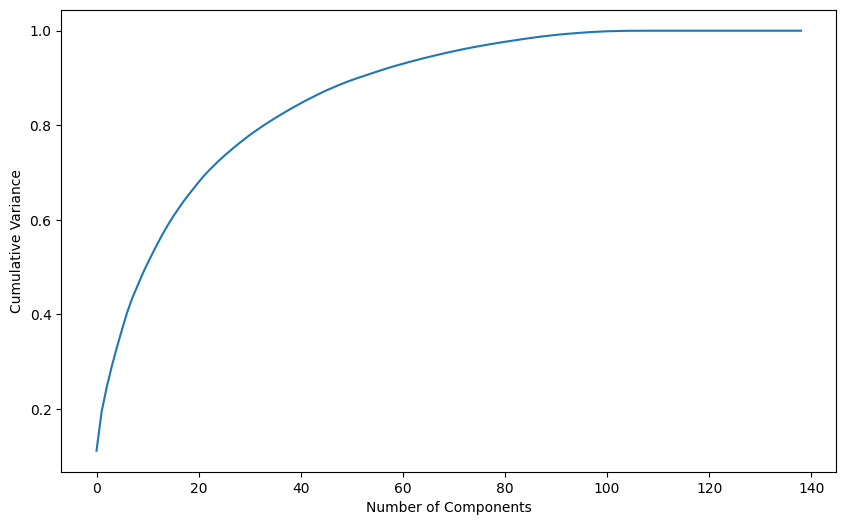

In [97]:
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

In [98]:
from sklearn.decomposition import IncrementalPCA


In [99]:
pca_final = IncrementalPCA(n_components=60)
X_train_pca = pca_final.fit_transform(X_train)

We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [100]:
X_test_pca = pca_final.transform(X_test)


In [101]:
# Importing scikit logistic regression module and metrics
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [102]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [103]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'recall',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_pca, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [104]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.177132,0.015213,0.008813,0.002142,0.01,{'C': 0.01},0.901408,0.887239,0.897460,0.895968,...,0.894297,0.005236,6,0.896762,0.894743,0.896907,0.893183,0.896469,0.895613,0.001441
1,0.429736,0.175729,0.012058,0.004063,0.10,{'C': 0.1},0.902125,0.888167,0.898159,0.897359,...,0.895323,0.005100,5,0.896472,0.896031,0.897433,0.893945,0.896586,0.896093,0.001166
2,0.574796,0.149339,0.013413,0.007022,1.00,{'C': 1},0.901886,0.888167,0.898625,0.898054,...,0.895694,0.004996,1,0.896646,0.896031,0.897316,0.894589,0.896294,0.896175,0.000903
3,0.300777,0.053713,0.007755,0.000480,10.00,{'C': 10},0.901886,0.888399,0.898392,0.897822,...,0.895648,0.004878,3,0.896646,0.896207,0.897257,0.894647,0.896411,0.896234,0.000868
4,0.297896,0.058535,0.008091,0.001013,100.00,{'C': 100},0.901886,0.888399,0.898625,0.897590,...,0.895648,0.004886,2,0.896646,0.896089,0.897257,0.894472,0.896294,0.896152,0.000929
5,0.299155,0.054670,0.007417,0.000070,1000.00,{'C': 1000},0.901886,0.888399,0.898392,0.897590,...,0.895602,0.004858,4,0.896646,0.896089,0.897433,0.894472,0.896469,0.896222,0.000979


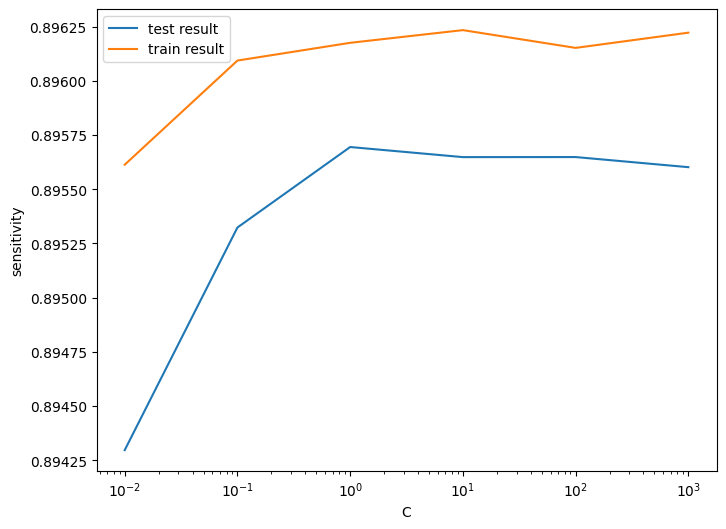

In [105]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [106]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8956944556442636 at C = 1


Logistic regression with optimal C

In [107]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [108]:
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [109]:
y_train_pred = log_pca_model.predict(X_train_pca)

In [110]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17764  3628]
 [ 2232 19160]]


In [111]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8630329094988781
Sensitivity:- 0.8956619296933434
Specificity:- 0.8304038893044129


## Prediction on the test set

In [113]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [114]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4410  943]
 [  31  151]]


In [115]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [116]:
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

Accuracy:- 0.8240289069557363


In [117]:
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.8296703296703297


In [118]:
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.8238371006912012


Model summary

Train set
Accuracy = 0.86

Sensitivity = 0.89

Specificity = 0.83


Test set

Accuracy = 0.82

Sensitivity = 0.83

Specificity = 0.82

Overall, the model is performing well in the test set, what it had learnt from the train set.

Support Vector Machine(SVM) with PCA

In [119]:
from sklearn.svm import SVC

Hyperparameter tuning
C:- Regularization parameter.

gamma:- Handles non linear classifications.

In [ ]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring= 'accuracy',
                        cv = 3,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [ ]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

Build the model with optimal hyperparameters

In [ ]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

Prediction on the test set


In [ ]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


## Decision tree with PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Hyperparameter tuning

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'recall',
                           cv = 5,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
#Logistic regression with No PCA

In [ ]:
import statsmodels.api as sm

In [ ]:
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
log_no_pca = log_no_pca.fit().summary()

In [ ]:
log_no_pca

Model analysis

We can see that there are few features have positive coefficients and few have negative.
Many features have higher p-values and hence became insignificant in the model.
Coarse tuning (Auto+Manual)

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).



### Feature Selection Using RFE

In [ ]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, 15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Model-1 with RFE selected columns

In [ ]:
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Checking VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
## Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

In [ ]:
# Building the model after removing og_others_8 variable.
X_train_sm_2 = sm.add_constant(X_train[log_cols])
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

In [ ]:
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


In [ ]:
# Removing offnet_mou_8 column since highest VIFs
log_cols.remove('offnet_mou_8')

In [ ]:
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that Model-3 log_no_pca_3 will be the final model.

## Model performance on the train set

In [ ]:
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

Creating a dataframe with the actual churn and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

Finding Optimal Probablity Cutoff Point

In [ ]:
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)

y_train_pred_final.head()

In [ ]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Analysis of the above curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

At point 0.6 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking 0.5 for acheiving higher sensitivity, which is our main goal.

In [ ]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Plotting the ROC Curve (Trade off between sensitivity & specificity)
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

### Testing the model on the test set

In [ ]:
X_test_log = X_test.copy()
X_test_log = X_test_log[log_cols]

In [ ]:
X_test_sm = sm.add_constant(X_test_log)


In [ ]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [ ]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

In [ ]:
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [ ]:
y_test_pred_final.head()


In [ ]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [ ]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex_axis(['CustID','churn','churn_prob'], axis=1)

In [ ]:
y_test_pred_final.head()

In [ ]:
# In the test set using probablity cutoff 0.5, what we got in the train set
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
y_test_pred_final.head()

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))


Business recomendation
Top predictors
Below are few top variables selected in the logistic regression model.

Variables	Coefficients
loc_ic_mou_8	-3.3287
og_others_7	-2.4711
ic_others_8	-1.5131
isd_og_mou_8	-1.3811
decrease_vbc_action	-1.3293
monthly_3g_8	-1.0943
std_ic_t2f_mou_8	-0.9503
monthly_2g_8	-0.9279
loc_ic_t2f_mou_8	-0.7102
roam_og_mou_8	0.7135
We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:-

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

Recomendations

Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
Target the customers, whose outgoing others charge in July and incoming others on August are less.
Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
Cutomers, whose monthly 3G recharge in August is more, are likely to be churned.
Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
Cutomers decreasing monthly 2g usage for August are most probable to churn.
Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.

## Plots of important predictors for churn and non churn customers


In [ ]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()


In [ ]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.

In [ ]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()


In [ ]:
# The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.